In [ ]:
!pip install apache-beam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.1/252.1 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) 

In [ ]:
!pip install \
tfx \
tensorflow \
tensorflow_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import pprint
import tempfile
import urllib

import absl
import tensorflow as tf
tf.get_logger().propagate = False
pp = pprint.PrettyPrinter()

from tfx import v1 as tfx

from tfx.orchestration.experimental.interactive.interactive_context import InteractiveContext
from tfx.types import Channel

from google.protobuf.json_format import MessageToDict

print('TensorFlow version: {}'.format(tf.__version__))
print('TFX version: {}'.format(tfx.__version__))

TensorFlow version: 2.15.1
TFX version: 1.15.1


In [ ]:
_pipeline_root = '/content/pipeline/'

_data_root = '/content/data/cifar10'

_data_filepath = os.path.join(_data_root, 'train.tfrecord')

In [ ]:
!mkdir -p {_data_root}

DATA_PATH = 'https://raw.githubusercontent.com/tensorflow/tfx/v0.21.4/tfx/examples/cifar10/data/train.tfrecord'

urllib.request.urlretrieve(DATA_PATH, _data_filepath)

('/content/data/cifar10/train.tfrecord',
 <http.client.HTTPMessage at 0x7ec7ce129a50>)

In [ ]:
context = InteractiveContext(pipeline_root=_pipeline_root)

In [ ]:
example_gen = tfx.components.ImportExampleGen(input_base=_data_root)

context.run(example_gen)

ExecutionResult(
    component_id: ImportExampleGen
    execution_id: 2
    outputs:
        examples: OutputChannel(artifact_type=Examples, producer_component_id=ImportExampleGen, output_key=examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [ ]:
artifact = example_gen.outputs['examples'].get()[0]
print(artifact.split_names, artifact.uri)

["train", "eval"] /content/pipeline/ImportExampleGen/examples/2


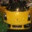

'Class ID: 1'


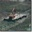

'Class ID: 8'


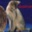

'Class ID: 3'


In [ ]:
import IPython.display as display

train_uri = os.path.join(example_gen.outputs['examples'].get()[0].uri, 'Split-train')

tfrecord_filenames = [os.path.join(train_uri, name)
                      for name in os.listdir(train_uri)]

dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")

image_feature_description = {
    'label': tf.io.FixedLenFeature([], tf.int64),
    'image_raw': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = dataset.map(_parse_image_function)

for features in parsed_image_dataset.take(3):
    image_raw = features['image_raw'].numpy()
    display.display(display.Image(data=image_raw))
    pprint.pprint('Class ID: {}'.format(features['label'].numpy()))

In [ ]:
statistics_gen = tfx.components.StatisticsGen(
    examples=example_gen.outputs['examples'])

context.run(statistics_gen)

ExecutionResult(
    component_id: StatisticsGen
    execution_id: 3
    outputs:
        statistics: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=StatisticsGen, output_key=statistics, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [ ]:
context.show(statistics_gen.outputs['statistics'])

In [ ]:
schema_gen = tfx.components.SchemaGen(
      statistics=statistics_gen.outputs['statistics'], infer_feature_shape=True)
context.run(schema_gen)

ExecutionResult(
    component_id: SchemaGen
    execution_id: 4
    outputs:
        schema: OutputChannel(artifact_type=Schema, producer_component_id=SchemaGen, output_key=schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [ ]:
context.show(schema_gen.outputs['schema'])

,Type,Presence,Valency,Domain
Feature name,,,,
'image_raw',BYTES,required,,-
'label',INT,required,,-


In [ ]:
example_validator = tfx.components.ExampleValidator(
    statistics=statistics_gen.outputs['statistics'],
    schema=schema_gen.outputs['schema'])
context.run(example_validator)

ExecutionResult(
    component_id: ExampleValidator
    execution_id: 5
    outputs:
        anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=ExampleValidator, output_key=anomalies, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [ ]:
context.show(example_validator.outputs['anomalies'])

In [ ]:
_transform_module_file = 'cifar10_transform.py'

In [ ]:
%%writefile {_transform_module_file}

import tensorflow as tf
import tensorflow_transform as tft

# Keys
_LABEL_KEY = 'label'
_IMAGE_KEY = 'image_raw'


def _transformed_name(key):
    return key + '_xf'

def _image_parser(image_str):
    image = tf.image.decode_image(image_str, channels=3)
    image = tf.reshape(image, (32, 32, 3))
    image = tf.cast(image, tf.float32)
    return image


def _label_parser(label_id):
    label = tf.one_hot(label_id, 10)
    return label


def preprocessing_fn(inputs):


    with tf.device("/cpu:0"):
        outputs = {
            _transformed_name(_IMAGE_KEY):
                tf.map_fn(
                    _image_parser,
                    tf.squeeze(inputs[_IMAGE_KEY], axis=1),
                    dtype=tf.float32),
            _transformed_name(_LABEL_KEY):
                tf.map_fn(
                    _label_parser,
                    tf.squeeze(inputs[_LABEL_KEY], axis=1),
                    dtype=tf.float32)
        }

    outputs[_transformed_name(_IMAGE_KEY)] = tft.scale_to_0_1(outputs[_transformed_name(_IMAGE_KEY)])

    return outputs

Writing cifar10_transform.py


In [ ]:
tf.get_logger().setLevel('ERROR')

transform = tfx.components.Transform(
    examples=example_gen.outputs['examples'],
    schema=schema_gen.outputs['schema'],
    module_file=os.path.abspath(_transform_module_file))

context.run(transform)

ExecutionResult(
    component_id: Transform
    execution_id: 6
    outputs:
        transform_graph: OutputChannel(artifact_type=TransformGraph, producer_component_id=Transform, output_key=transform_graph, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        transformed_examples: OutputChannel(artifact_type=Examples, producer_component_id=Transform, output_key=transformed_examples, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        updated_analyzer_cache: OutputChannel(artifact_type=TransformCache, producer_component_id=Transform, output_key=updated_analyzer_cache, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        pre_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=pre_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        pre_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=pre_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_schema: OutputChannel(artifact_type=Schema, producer_component_id=Transform, output_key=post_transform_schema, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_stats: OutputChannel(artifact_type=ExampleStatistics, producer_component_id=Transform, output_key=post_transform_stats, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False)
        post_transform_anomalies: OutputChannel(artifact_type=ExampleAnomalies, producer_component_id=Transform, output_key=post_transform_anomalies, additional_properties={}, additional_custom_properties={}, _input_trigger=None, _is_async=False))

In [ ]:
train_uri = os.path.join(transform.outputs['transformed_examples'].get()[0].uri, 'Split-train')

tfrecord_filenames = [os.path.join(train_uri, name)
                      for name in os.listdir(train_uri)]

dataset = tf.data.TFRecordDataset(tfrecord_filenames, compression_type="GZIP")

In [ ]:
def get_records(dataset, num_records):
    records = []

    for tfrecord in dataset.take(num_records):

        serialized_example = tfrecord.numpy()

        example = tf.train.Example()

        example.ParseFromString(serialized_example)

        example_dict = (MessageToDict(example))

        records.append(example_dict)

    return records

In [ ]:
sample_records = get_records(dataset, 1)

pp.pprint(sample_records)

[{'features': {'feature': {'image_raw_xf': {'floatList': {'value': [0.16470589,
                                                                    0.09019608,
                                                                    0.0627451,
                                                                    0.2627451,
                                                                    0.2,
                                                                    0.14901961,
                                                                    0.28627452,
                                                                    0.22352941,
                                                                    0.16078432,
                                                                    0.29803923,
                                                                    0.2509804,
                                                                    0.16470589,
                                                  